## 합성곱 신경망의 시각화
- 합성곱층은 여러개의 필터를 사용해 이미지에서 특징을 시각화 함
    - 각 필터(뉴런)은 커널이라 부르는 가중치와 절편을 가지고 있음(일반적으로 절편은 시각적 의미가 없음)
        - 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함

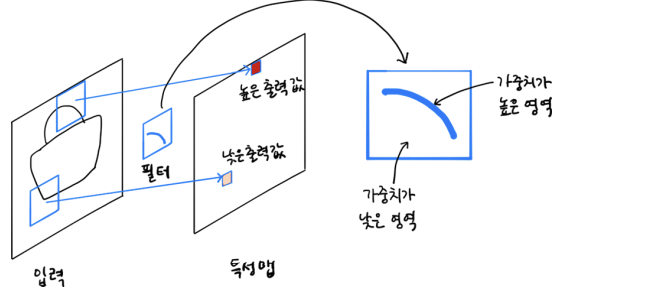

- 픽셀의 값이 0인 부분은 출력값이 낮아 가중치가 0 / 픽셀의 값이 255에 가까워 질수록 출력값이 높아 가중치가 높아짐

- 둥근 모서리가 있는 영역은 크게 활성화 되고 그렇지 않은 영역은 낮은 값을 만든다
    - 그렇게 되면 둥근 모서리의 출력이 커짐

## 가중치 시각화

In [1]:
from tensorflow import keras

In [2]:
model=keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers # 리스트에 저장되어 있음

In [5]:
# 여러층으로 되어있는 모델의 일부층의 정보를 사용하려면 layers[]를 사용
conv=model.layers[0] # 이 층에서 사용한 가중치 등의 정보를 포함하고 있음

In [10]:
conv.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-7.32283574e-03, -2.76066959e-01, -2.29666814e-01,
            5.99172339e-02, -3.87964934e-01,  1.33019403e-01,
           -3.46510485e-02,  2.12482870e-01, -1.13465361e-01,
           -2.01910540e-01,  1.42836288e-01,  2.26579204e-01,
            1.39875486e-01,  1.58760101e-01,  8.29053670e-03,
           -2.01704409e-02,  1.68450326e-02, -4.39175367e-02,
           -6.06019199e-02, -5.39778292e-01,  6.91066086e-02,
           -3.96294624e-01,  3.79520267e-01,  7.46241808e-02,
            2.82125801e-01, -2.57025242e-01, -3.22480828e-01,
            1.12556249e-01, -2.99343225e-02,  1.16686374e-01,
            8.69224295e-02, -1.73100695e-01]],
 
         [[ 6.03320748e-02,  2.44934618e-01, -2.52501667e-01,
            1.62575051e-01, -2.24936053e-01,  1.40833542e-01,
            3.23352814e-01,  3.11451942e-01,  1.11825876e-01,
            2.42697284e-01,  3.18288743e-01,  8.66079777e-02,
       

In [9]:
len(conv.weights)

2

In [11]:
# 첫번째 합성곱의 가중치
# 필터의 크기 3,3이고 합성곱 층에 전달되는 입력의 깊이가 1
# 실제 필터의 크기는 3,3,1 - 필터 개수는 32개 이므로
# 첫번째 층의 가중치는 [3,3,1,32]
conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [13]:
conv.weights[1].shape # 절편

TensorShape([32])

In [14]:
type(conv.weights[0]) # 텐서 객체

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [17]:
conv_weights=conv.weights[0].numpy()
# 가중치의 평균과 표준편차 확인
print(conv_weights.mean(),conv_weights.std())

-0.024748785 0.2622387


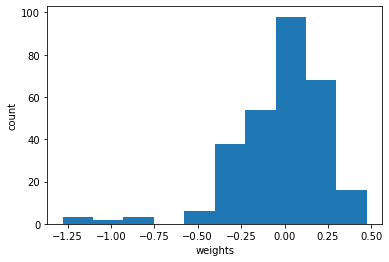

In [22]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

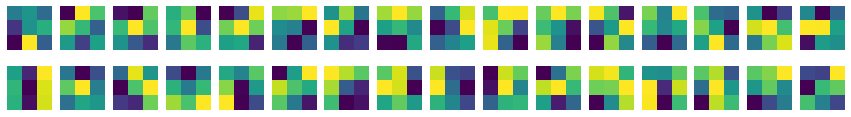

In [35]:
# 32개의 커널을 16개 씩 두줄에 걸쳐 출력해 봄
# TensorShape([3,3,1,32])
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        # 0~31까지 출력해야하므로 i=0일때 0~15 1일때 16~31까지 출력
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')
# 3*3의 이미지에서 밝은 부분이 움직이면서 가중치 생성

- 밝은 부분이 높은 값이고 어두운 부분이 낮은 값임

### 훈련하지 않은 모델의 가중치

In [23]:
# 훈련 전 빈 모델 생성
# 훈련하지 않은 상태에서 가중치가 있는지 확인
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))


In [29]:
no_training_conv=no_training_model.layers[0]
# 힉습하지 않은 빈 모델도 임의의 가중치를 갖고 있음
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [30]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

0.004226726 0.080942705


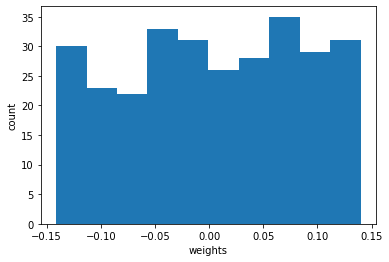

In [31]:
import matplotlib.pyplot as plt
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

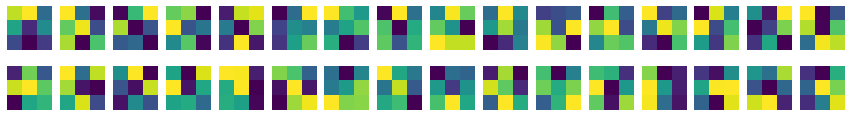

In [36]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        # 0~31까지 출력해야하므로 i=0일때 0~15 1일때 16~31까지 출력
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')

#### 훈련모델과 비훈련모델의 가중치 이미지

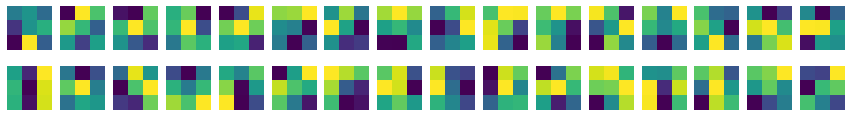
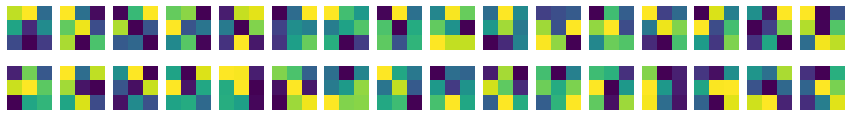

- 히스토그램은 -0.15에서 +0.15사이에서 비교적 고른 분포를 나타냄
    - 신경망 가중치를 처음 초기화 할때 균등분포에서 랜덤하게 값을 선택하기 때문임
- 전체적으로 가중치가 밋밋하게 초기화 되어 있음
- 두 그림을 비교해 보면
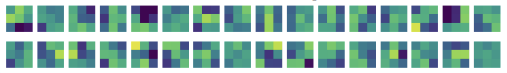
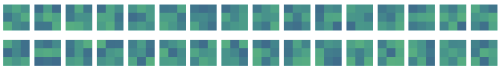
- 학습된 가중치는 특성을 찾기위한 유용한 패턴을 학습중 이라는 것을 예측할 수 있음

## 함수형 API(참고)
- 층을 함수처럼 사용할 수 있는 API
    - 모델에 따라 입력이 2개 출력이 2개라면 Sequential() 클래스를 사용하기 어려울 수 있음

### Dense층 2개로 이루어진 완전 연결 신경망을 함수형 API로 생성하기 예시
- dense1 = keras.layers.Dense(100, activation='sigmoid')
- dense2 = keras.layers.Dense(10, activation='softmax')

### Sequential 객체 대신에 함수처럼 호출
- hidden = dense1(inputs)
- ouputs = dense2(hidden)
- 층을 함수처럼 사용한다고 해서 함수형 API라고 함

### 그 후 inpusts와 outputs를 모델 클래스로 연결
model1 = keras.Model(inputs, outputs)

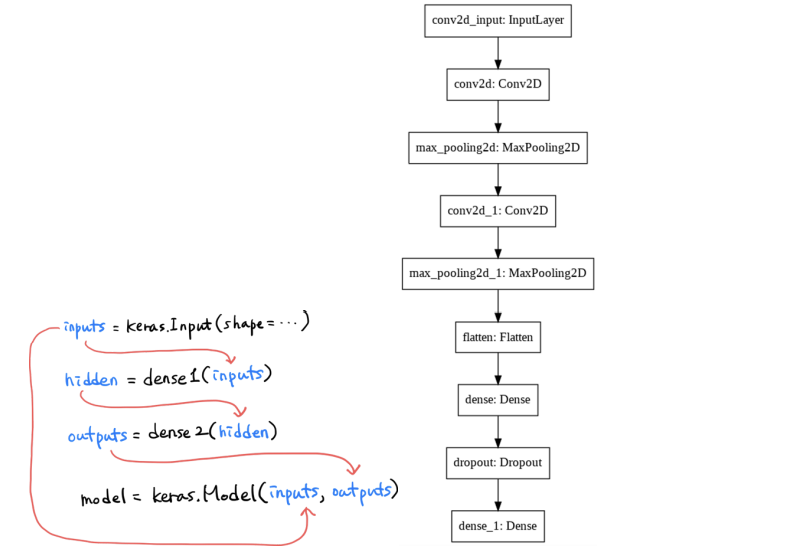

### 모델 객체의 층
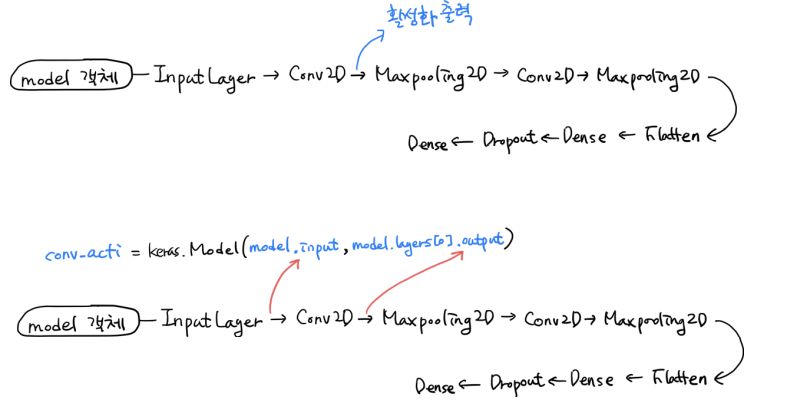

### 층과 층사이 특성을 시각화 하기 위해 한 층에 대한 입력과 출력을 이용해서 모델을 생성
- 입력은 model.input 속성에 저장되어 있음

In [38]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [39]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_2')>

- model.input과 model.layers[0].output을 연결하는 새로운 convi_acti 모델을 만들수 있음

In [40]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [41]:
# 데이터 읽은 후
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


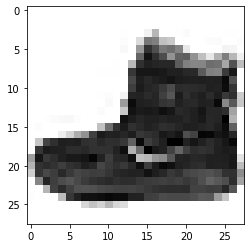

In [42]:
# 첫번째 이미지 시각화
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [43]:
# 첫번째 이미지에 대해 첫번째 합성곱층에서 어떻게 특성화를 진행하는 지 시각화
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 261ms/step


In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


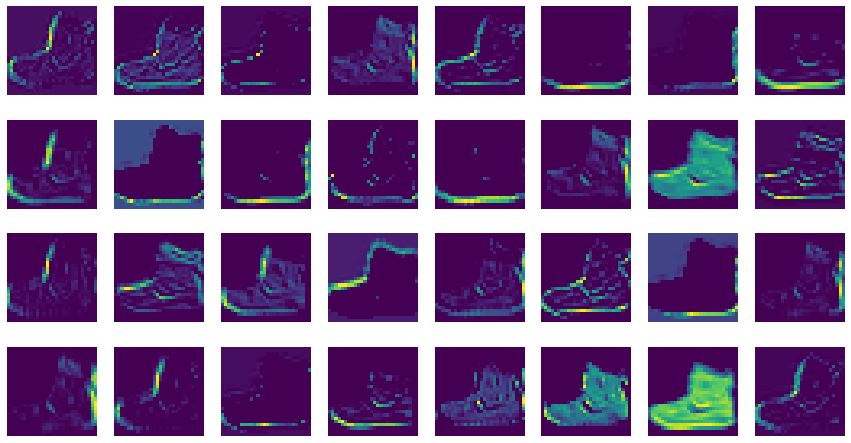

In [46]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()


In [50]:
model.layers
# 인덱스 2는 풀링층

In [51]:
# 첫번째 이미지에 대해 두번째 합성곱층에서 어떻게 특성화를 진행하는지 시각화
conv2_acti=keras.models.Model(conv_acti.input,model.layers[2].output)

In [52]:
feature_maps=conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/255.0)

1/1 [==============================] - 0s 76ms/step


In [53]:
print(feature_maps.shape)

(1, 14, 14, 64)


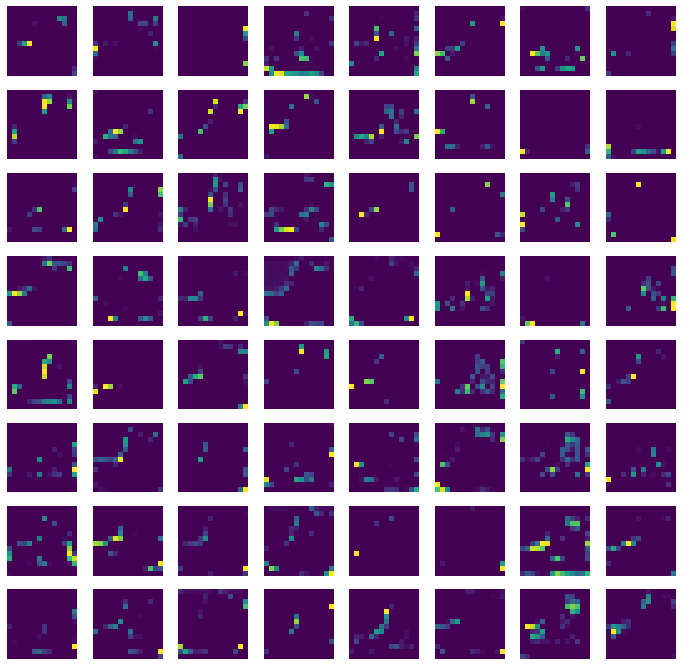

In [54]:
# <keras.layers.convolutional.conv2d.Conv2D at 0x25d1ff59580>까지 진행한 이미지
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()
# 첫번째 층에서 나온 output을 가지고 새로운 특성을 만들어냄